In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
%matplotlib inline


'''
using csv downloaded from https://benjaminbenben.com/lastfm-to-csv/
setting headers, converting dates and times to datetime format
'''
scrobbles = pd.read_csv("scrobbles.csv",sep=',',names = ["Artist", "Album", "Song", "Date"],parse_dates=['Date'])

In [8]:
#Setting columns for yearly/monthly/day of the week analysis
scrobbles['Year'] = scrobbles['Date'].dt.year
scrobbles['Month'] = scrobbles['Date'].dt.month_name()
scrobbles['month_year'] = scrobbles['Date'].dt.to_period('M')

In [16]:
scrobbles

,Artist,Album,Song,Date,Year,Month,month_year
0,Nujabes,Modal Soul,Feather (feat. Cise Starr & Akin from Cyne),2020-08-04 00:02:00,2020,August,2020-08
1,TV Girl,French Exit,Lovers Rock,2020-08-03 23:58:00,2020,August,2020-08
2,Thundercat,Black Qualls (Single Version),Black Qualls - Single Version,2020-08-03 23:55:00,2020,August,2020-08
3,Earl Sweatshirt,Some Rap Songs,Shattered Dreams,2020-08-03 23:53:00,2020,August,2020-08
4,JAY-Z,4:44,Caught Their Eyes,2020-08-03 23:49:00,2020,August,2020-08
...,...,...,...,...,...,...,...
59334,Team Teamwork,The Ocarina of Rhyme,Don't Touch Me (Gerudo Valley),2012-05-11 02:52:00,2012,May,2012-05
59335,Team Teamwork,The Ocarina of Rhyme,Don't Touch Me (Gerudo Valley),2012-05-11 02:49:00,2012,May,2012-05
59336,Team Teamwork,The Ocarina of Rhyme,Don't Touch Me (Gerudo Valley),2012-05-11 02:46:00,2012,May,2012-05
59337,Team Teamwork,The Ocarina of Rhyme,Don't Touch Me (Gerudo Valley),2012-05-11 02:43:00,2012,May,2012-05


## Top Artists

In [10]:
top_artists = scrobbles['Artist'].value_counts().head(25)

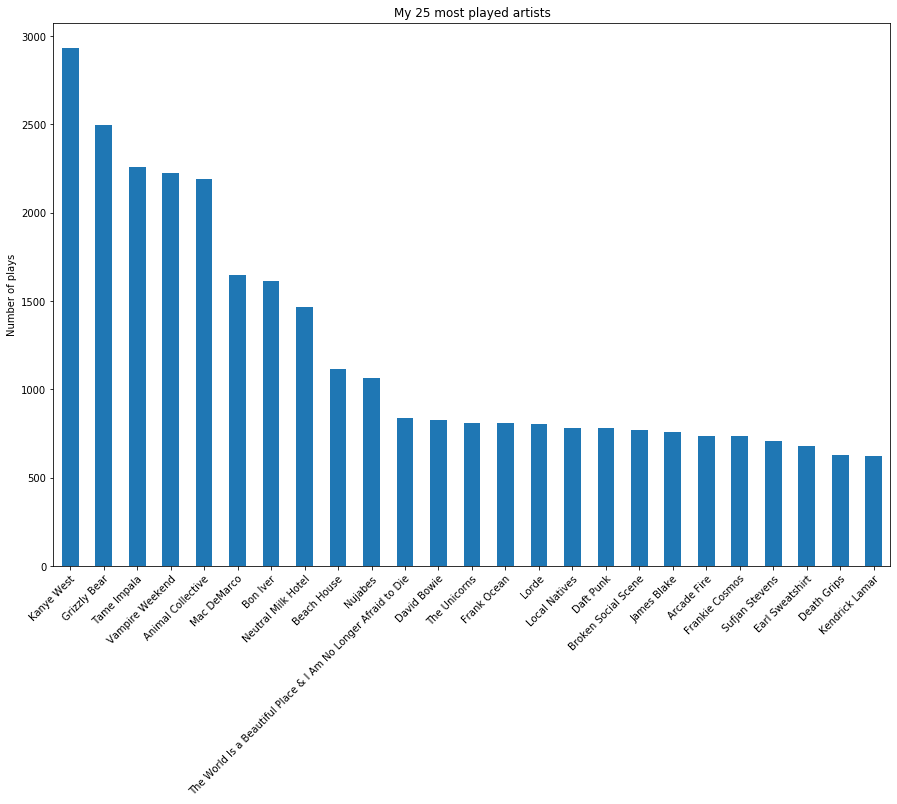

In [11]:
ax = top_artists.plot(kind='bar',figsize=[15,10])

ax.set_title("My 25 most played artists")
ax.set_ylabel("Number of plays")
ax.set_xticklabels(labels=top_artists.index,rotation=45,rotation_mode='anchor',ha='right')

mpl.pyplot.show()

# Unique Artists/Songs

In [25]:
unique_scrobbles = scrobbles.sort_values(by='Date').drop_duplicates('Song')
unique_artists = scrobbles.sort_values(by='Date').drop_duplicates('Artist')

print(f"The number of unique songs listened to is {len(unique_scrobbles)}")
print(f"The number of unique songs listened to is {len(unique_artists)}")

The number of unique songs listened to is 7473
The number of unique songs listened to is 1150


# Yearly analysis

In [17]:
yearly_scrobbles = scrobbles['Year'].value_counts().sort_index()

In [18]:
yearly_scrobbles

2012     4263
2013    11438
2014    13102
2015    11040
2016     4253
2017     7472
2018     2098
2019     2512
2020     3161
Name: Year, dtype: int64

In [19]:
'''
Removing 2012 and 2020 because they're incomplete 
(last.fm account began in May of 2012, and the 2020 only has counts up to August)
'''
yearly_scrobbles.drop(labels=[2012,2020],inplace=True)

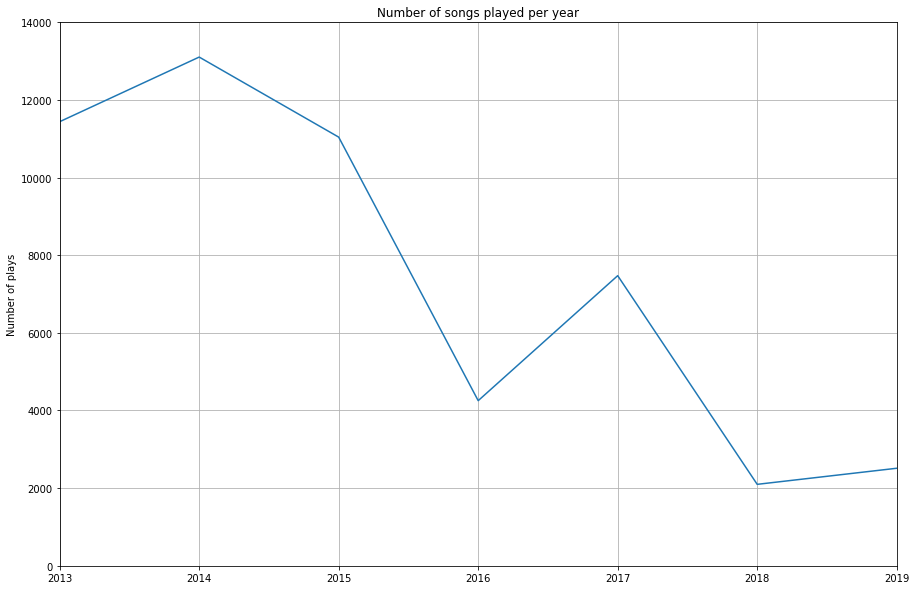

In [27]:
ax = yearly_scrobbles.plot(kind='line',figsize=(15,10))
ax.set_title("Number of songs played per year")
ax.set_ylabel("Number of plays")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(yearly_scrobbles.index[0],yearly_scrobbles.index[-1])
ax.set_ylim(0,14000)

mpl.pyplot.show()

# Monthly analysis

In [22]:
month_year_scrobbles = scrobbles['month_year'].value_counts().sort_index()

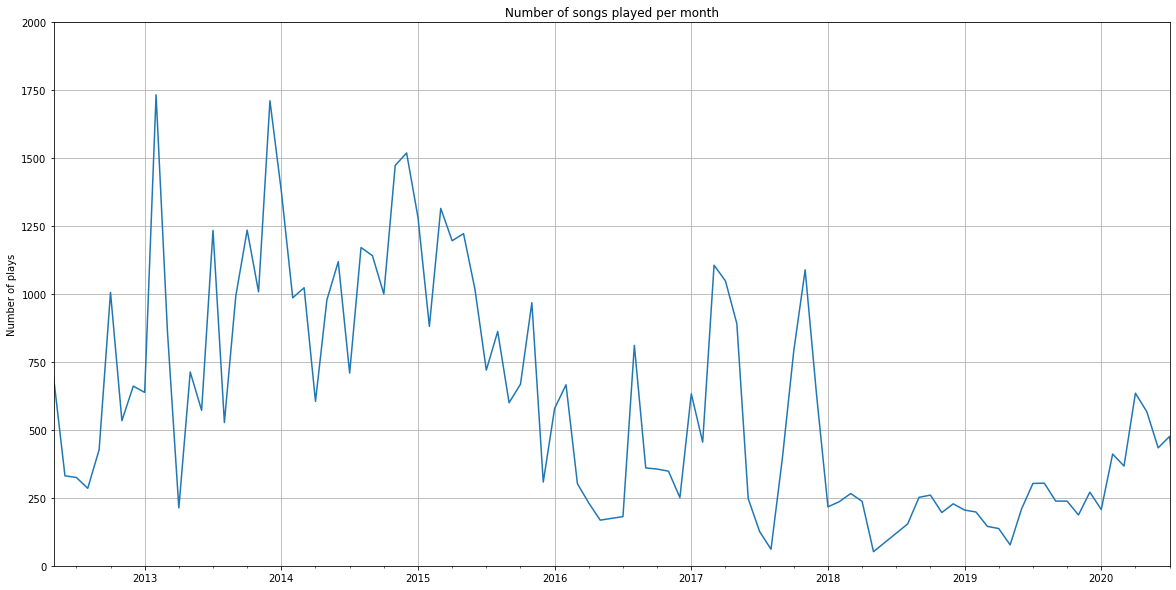

In [24]:
ax = month_year_scrobbles.plot(kind='line',figsize=(20,10))

ax.set_title("Number of songs played per month")
ax.set_ylabel("Number of plays")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(month_year_scrobbles.index[0],month_year_scrobbles.index[-2])
ax.set_ylim(0,2000)

mpl.pyplot.show()

In [32]:
unique_month_year_scrobbles = unique_scrobbles['month_year'].value_counts().sort_index()

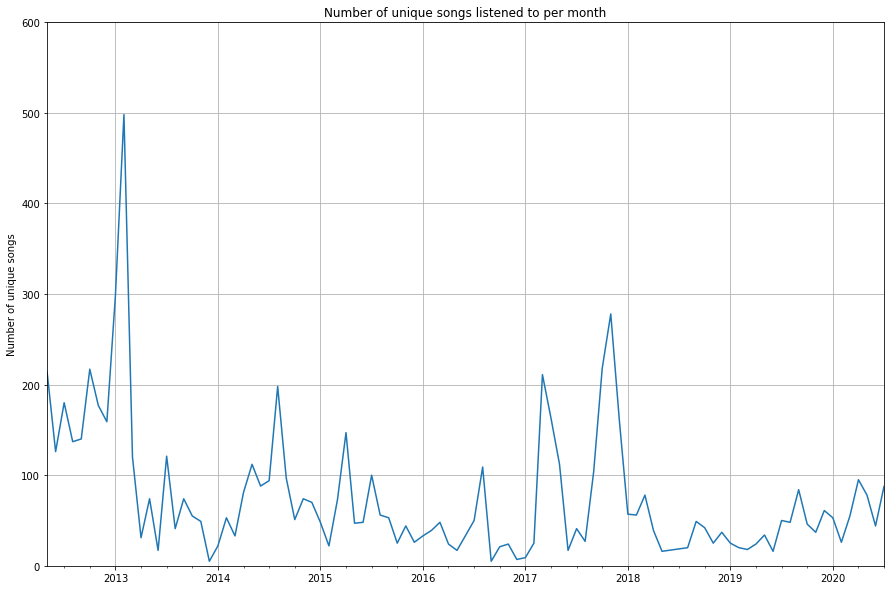

In [38]:
ax = unique_month_year_scrobbles.plot(kind='line',figsize=(15,10))

ax.set_title("Number of unique songs listened to per month")
ax.set_ylabel("Number of unique songs")
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_xlim(month_year_scrobbles.index[0],month_year_scrobbles.index[-2])
ax.set_ylim(0,600)

mpl.pyplot.show()